## 人工神经网络——Classification example

In [1]:
from sklearn import datasets

'''
The regression example of the Boston dataset.
'''

digits = datasets.load_digits()

X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [2]:
print(X_train.shape)
print(y_train.shape)

(1437, 64)
(1437,)


### 调用 DeeplearningRegression 里面的 ANN 框架

In [3]:
from frames.DeeplearningClassification import ANN

'''
参数说明：
hidden_layers: 每层神经元个数，传入 list
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128
'''
ann = ANN(hidden_layers=[128, 64], learning_rate=[1e-3, 1e-5, 1e-7], epoch=1000, batch_size=256) # 采用梯度衰减策略

In [4]:
ann.fit(X_train, y_train)

Training... epoch: 100, loss: 0.1387593001127243, acc: 1.0
Training... epoch: 200, loss: 0.02715243026614189, acc: 1.0
Training... epoch: 300, loss: 0.012919330038130283, acc: 1.0
Training... epoch: 400, loss: 0.00406399043276906, acc: 1.0
Training... epoch: 500, loss: 0.00527482945472002, acc: 1.0
Training... epoch: 600, loss: 0.002619046252220869, acc: 1.0
Training... epoch: 700, loss: 0.002106332452967763, acc: 1.0
Training... epoch: 800, loss: 0.0010046084644272923, acc: 1.0
Training... epoch: 900, loss: 0.0004950830480083823, acc: 1.0
Training... epoch: 1000, loss: 0.0003343867720104754, acc: 1.0
Training completed!


### 调用 score 得到结果，调用 predict 得到值

In [5]:
ann.score(X_test, y_test)

acc: 0.9805555555555555, precision: 0.9809432234432235, recall: 0.9797543378031184, f1: 0.9799572830660953


### 调用 result_plot 保存结果图

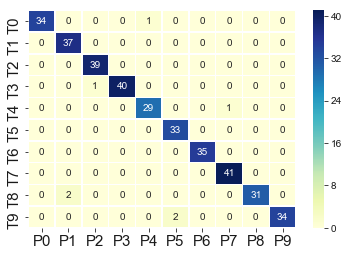

Save the picture successfully!


In [6]:
import os

save_path = './Example_save_resultes/Classification/save_pngs/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
save_png = os.path.join(save_path, 'ann_picture.png')
ann.confusion_matrix_result(X_test, y_test, save_file=save_png, is_show=True)

### 保存模型结果, 这里有两个参数，统计 dataset 是否使用了 标准化 和 pca 的预处理

In [7]:
results_path = './Example_save_resultes/Classification/'
if not os.path.exists(results_path):
    os.makedirs(results_path)
results_file = os.path.join(results_path, 'ann_result.csv')
ann.save_result(results_file, is_standard=False, is_PCA=False)

Save results success!


### 调用 loss_plot 查看训练过程， loss 的变化

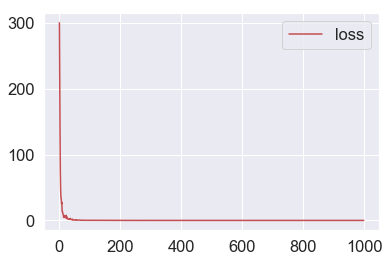

In [8]:
ann.loss_plot()